In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [5]:
df = fetch_california_housing()
X, y = df.data, df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
N_observations, N_estimators = X.shape
print("No. of observations:", N_observations)
print("No. of estimators:", N_estimators)

No. of observations: 20640
No. of estimators: 8


In [10]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
# Time for training

start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf
print("Random Forest Classifier train time:", rf_train_time)

start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb
print("XGBoost train time:", xgb_train_time)

Random Forest Classifier train time: 9.92418098449707
XGBoost train time: 0.10779356956481934


In [13]:
# Time for testing

start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_test_time = end_time_rf - start_time_rf
print("Random Forest Classifier test time:", rf_test_time)

start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_test_time = end_time_xgb - start_time_xgb
print("XGBoost test time:", xgb_test_time)

Random Forest Classifier test time: 0.1557614803314209
XGBoost test time: 0.007134914398193359


In [17]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor\nMSE: {mse_rf:.4f}\nR^2 Score: {r2_rf:.4f}")

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost\nMSE: {mse_xgb:.4f}\nR^2 Score: {r2_xgb:.4f}")

Random Forest Regressor
MSE: 0.2566
R^2 Score: 0.8045
XGBoost
MSE: 0.2118
R^2 Score: 0.8386


In [19]:
std_y = np.std(y_test)
std_y

np.float64(1.1456614280902815)

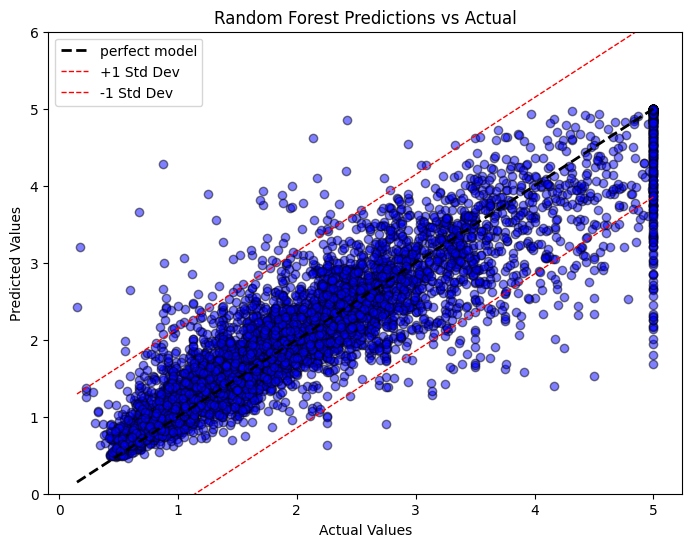

In [25]:
# Random Forest Plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='perfect model')
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, label="-1 Std Dev")
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

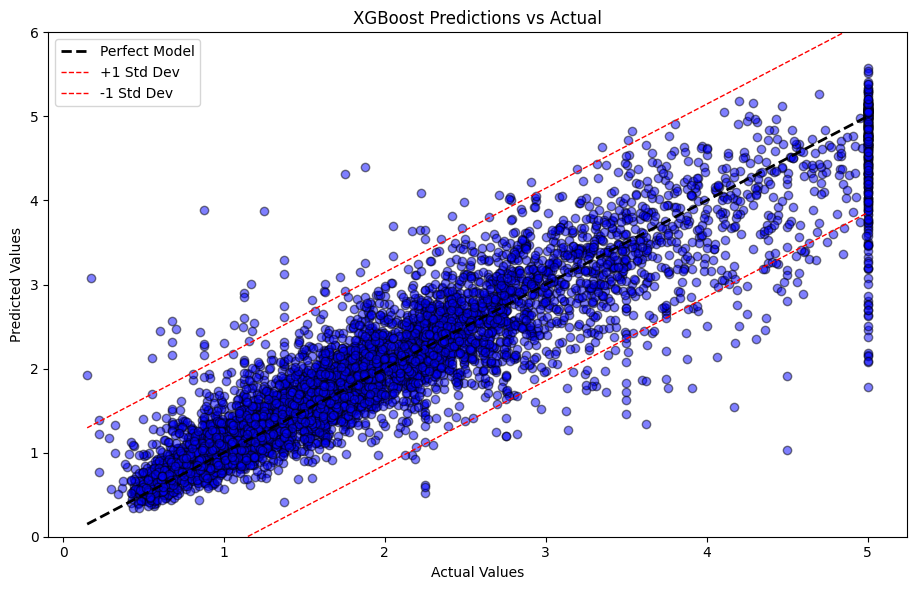

In [26]:
# XBBoost Plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue', ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, label="-1 Std Dev")
plt.ylim(0, 6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()